# 2010 Baja CA EQ, QTM Catalog Mapping: Density Grid Test Point1



In [1]:
# IMPORT CELL; updated 2/11/21

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') 
from importlib import reload
import time
import math
import scipy.stats as stats

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

import obspy
from obspy.core import UTCDateTime
from obspy import read

import obspy.geodetics as gd # Imported whole file
#from obspy.geodetics import locations2degrees # calc_dist() alike?
#from obspy.taup.taup_geo import calc_dist # calc_dist()

import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

print("Imported! ")

Imported! 


In [2]:
%%time
QTM_Range = pd.read_pickle("QTM_Range.pkl")
QTM_Range

Wall time: 729 ms


,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
341563,2010,3,5,22,40,56.570,332205,33.63921,-116.69371,16.395,...,11023517,0.208,0.021,0,2010-03-05T22:40:56.570000Z,1.267829e+09,2010-03-05T22:40:56.570000Z,1.267829e+09,-30.0,-720.0
341564,2010,3,5,22,44,28.810,332206,33.00096,-116.33812,8.098,...,14599964,0.274,0.024,0,2010-03-05T22:44:28.810000Z,1.267829e+09,2010-03-05T22:44:28.809999Z,1.267829e+09,-30.0,-720.0
341565,2010,3,5,22,59,35.670,332207,33.68388,-116.70518,16.740,...,9715717,0.182,0.019,0,2010-03-05T22:59:35.670000Z,1.267830e+09,2010-03-05T22:59:35.670000Z,1.267830e+09,-30.0,-720.0
341566,2010,3,5,23,22,38.272,14597244,33.89683,-116.20141,9.967,...,14597244,1.0,0.01,1,2010-03-05T23:22:38.272000Z,1.267831e+09,2010-03-05T23:22:38.271999Z,1.267831e+09,-30.0,-719.0
341567,2010,3,5,23,37,37.430,332209,33.17265,-115.61604,2.806,...,11247074,0.191,0.02,0,2010-03-05T23:37:37.430000Z,1.267832e+09,2010-03-05T23:37:37.429999Z,1.267832e+09,-30.0,-719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479972,2010,5,4,22,34,42.330,14693572,32.22300,-115.27750,8.680,...,14693572,1.0,0.01,0,2010-05-04T22:34:42.330000Z,1.273012e+09,2010-05-04T22:34:42.329999Z,1.273012e+09,30.0,720.0
479973,2010,5,4,22,35,48.290,14693580,32.20351,-115.25989,3.764,...,14693580,1.0,0.01,1,2010-05-04T22:35:48.290000Z,1.273013e+09,2010-05-04T22:35:48.289999Z,1.273013e+09,30.0,720.0
479974,2010,5,4,22,36,27.620,36905559,32.65953,-115.79090,8.256,...,36905559,1.0,0.01,0,2010-05-04T22:36:27.620000Z,1.273013e+09,2010-05-04T22:36:27.620000Z,1.273013e+09,30.0,720.0
479975,2010,5,4,22,37,25.670,465027,33.72415,-116.82370,17.104,...,14063504,0.233,0.019,0,2010-05-04T22:37:25.670000Z,1.273013e+09,2010-05-04T22:37:25.670000Z,1.273013e+09,30.0,720.0


## Density Grid: First Gridpoint - Point1

(32.7, -115.8)

In [3]:
GridPoints = pd.read_csv("Maps/Density Grid/GridPoints.csv")

In [4]:
# Create first point for analysis

Point1 = GridPoints.loc[(GridPoints["LATITUDE"] >= 32.7) & (GridPoints["LONGITUDE"] >= -115.8)]
#Point1 = Point1.loc[Point1["LONGITUDE"] == -115.8]
Point1 = Point1.iloc[0]
Point1 # 32.7, -115.8

Unnamed: 0    742.0
LATITUDE       32.7
LONGITUDE    -115.8
Name: 742, dtype: float64

In [5]:
# TEST CELL

GridPoints.loc[(GridPoints.LATITUDE == 32.7)] # Never use == boolean operator for floats!
GridPoints.iloc[720]["LATITUDE"] # Verified precision error

#Point1.LATITUDE # type: numpy float64
#Point1.LONGITUDE # type: numpy float64

gd.degrees2kilometers(1)

111.19492664455873

In [6]:
# Use ObsPy: calc_dist() function (returns distance between two points)
# calc_dist() can take list input?
# calc_dist(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
#calc_dist(Point1.LATITUDE, Point1.LONGITUDE, 32, 115, )

In [7]:
# Use ObsPy: locations2degrees function (returns distance between two points)
# location2degrees(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
# returns distance in degrees as float

Dists1_Deg = gd.locations2degrees(Point1.LATITUDE, Point1.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
# Got distances of all earthquakes in catalog from Point1
Dists1_KM = gd.degrees2kilometers(Dists1_Deg)
# Converted all distances to kilometers
TestDF = pd.DataFrame(data = Dists1_Deg)
TestDF.describe()

,0
count,138415.000000
mean,0.369678
std,0.604314
min,0.001640
25%,0.047160
50%,0.087031
75%,0.540101
max,6.252688


In [8]:
# Define a new copy of the data
Point1Data = QTM_Range.copy(deep = True)
Point1Data["DISTANCE"] = Dists1_KM
Point1Data.describe()

# Only take data within, say, 11km of Point1!
Point1Data_11KM = Point1Data.loc[Point1Data["DISTANCE"] <= 11]
Point1Data_11KM
# Sometimes, this returns only five datapoints instead of 989; switched notebooks and it was fine?
Point1Data["DEGDIST"] = Dists1_Deg
Point1Data_Deg = Point1Data.loc[Point1Data["DEGDIST"] <= 0.1]
#Point1Data.describe()

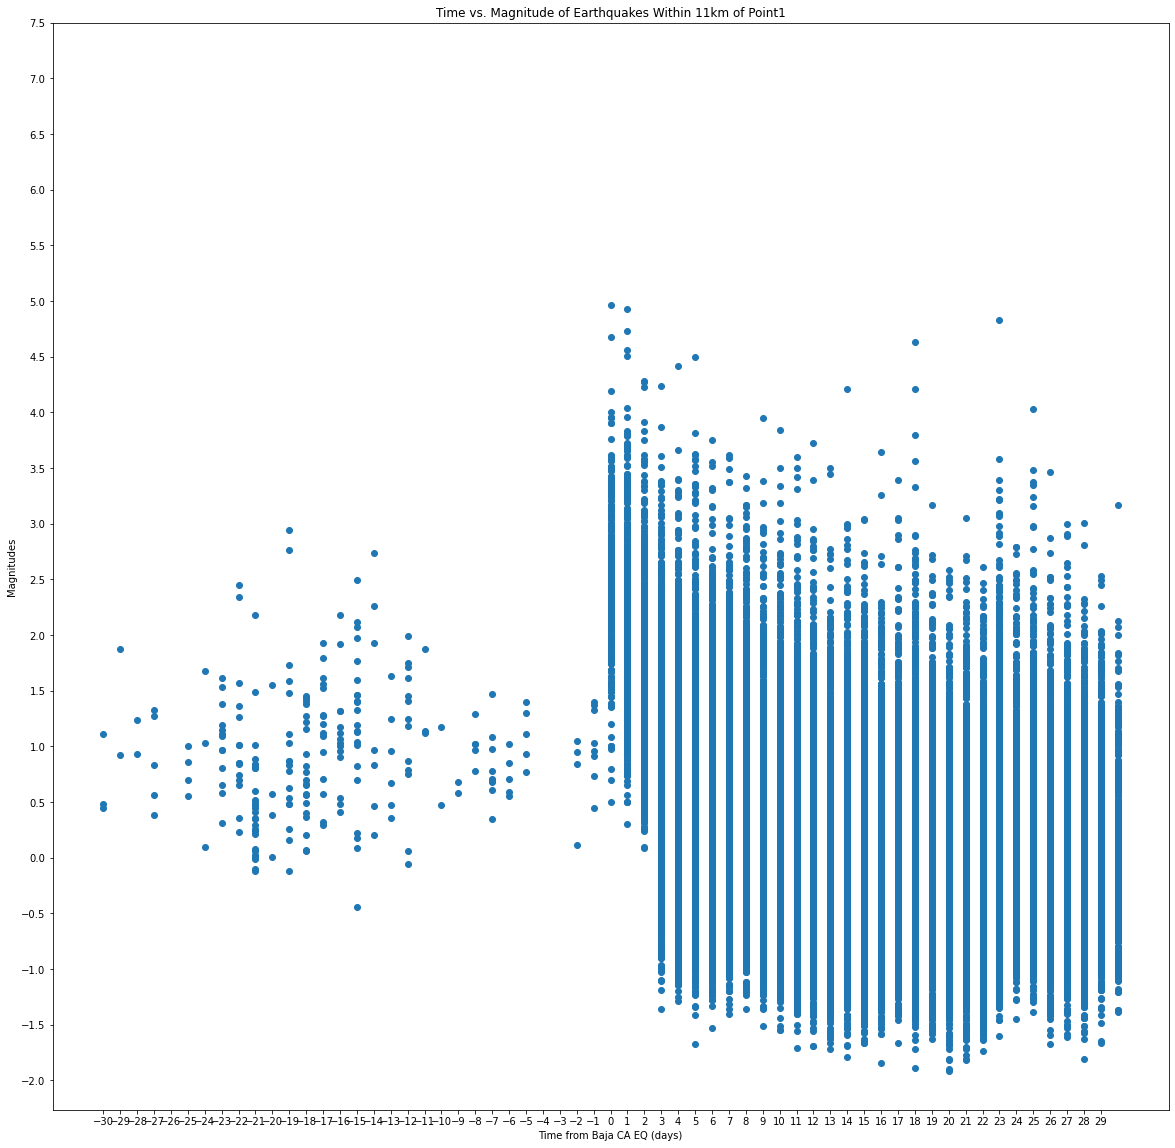

In [9]:
# Plot time vs. magnitude for Point1 data: days

plt.figure(figsize=(20,20))
plt.scatter(Point1Data_11KM["RELATIVE DAY"], Point1Data_11KM["MAGNITUDE"]);
plt.xlabel("Time from Baja CA EQ (days)");
plt.ylabel("Magnitudes");
plt.title("Time vs. Magnitude of Earthquakes Within 11km of Point1");
plt.xticks(range(-30, 30));
plt.yticks(np.arange(-2,8,0.5));

plt.savefig("Maps/Density Grid/Point1/Point1_MagnitudeDays.png", facecolor = "white");

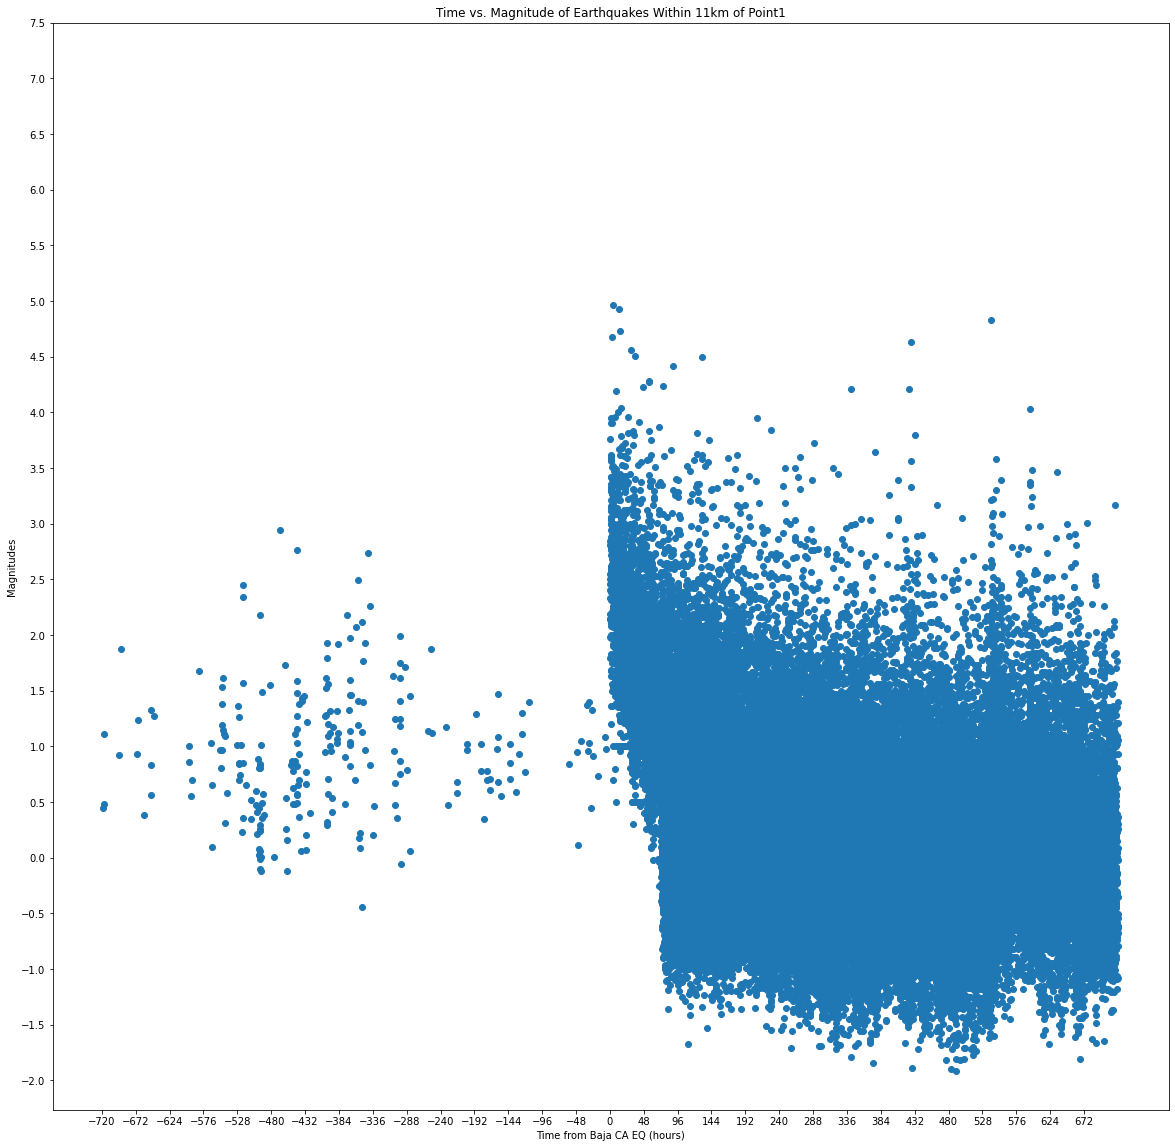

In [10]:
# Plot time vs. magnitude: hours

plt.figure(figsize=(20,20))
plt.scatter(Point1Data_11KM["RELATIVE HOUR"], Point1Data_11KM["MAGNITUDE"]);
plt.xlabel("Time from Baja CA EQ (hours)");
plt.ylabel("Magnitudes");
plt.title("Time vs. Magnitude of Earthquakes Within 11km of Point1");
plt.xticks(range(-720,720, 48));
plt.yticks(np.arange(-2,8,0.5));

plt.savefig("Maps/Density Grid/Point1/Point1_MagnitudeHours.png", facecolor = "white");

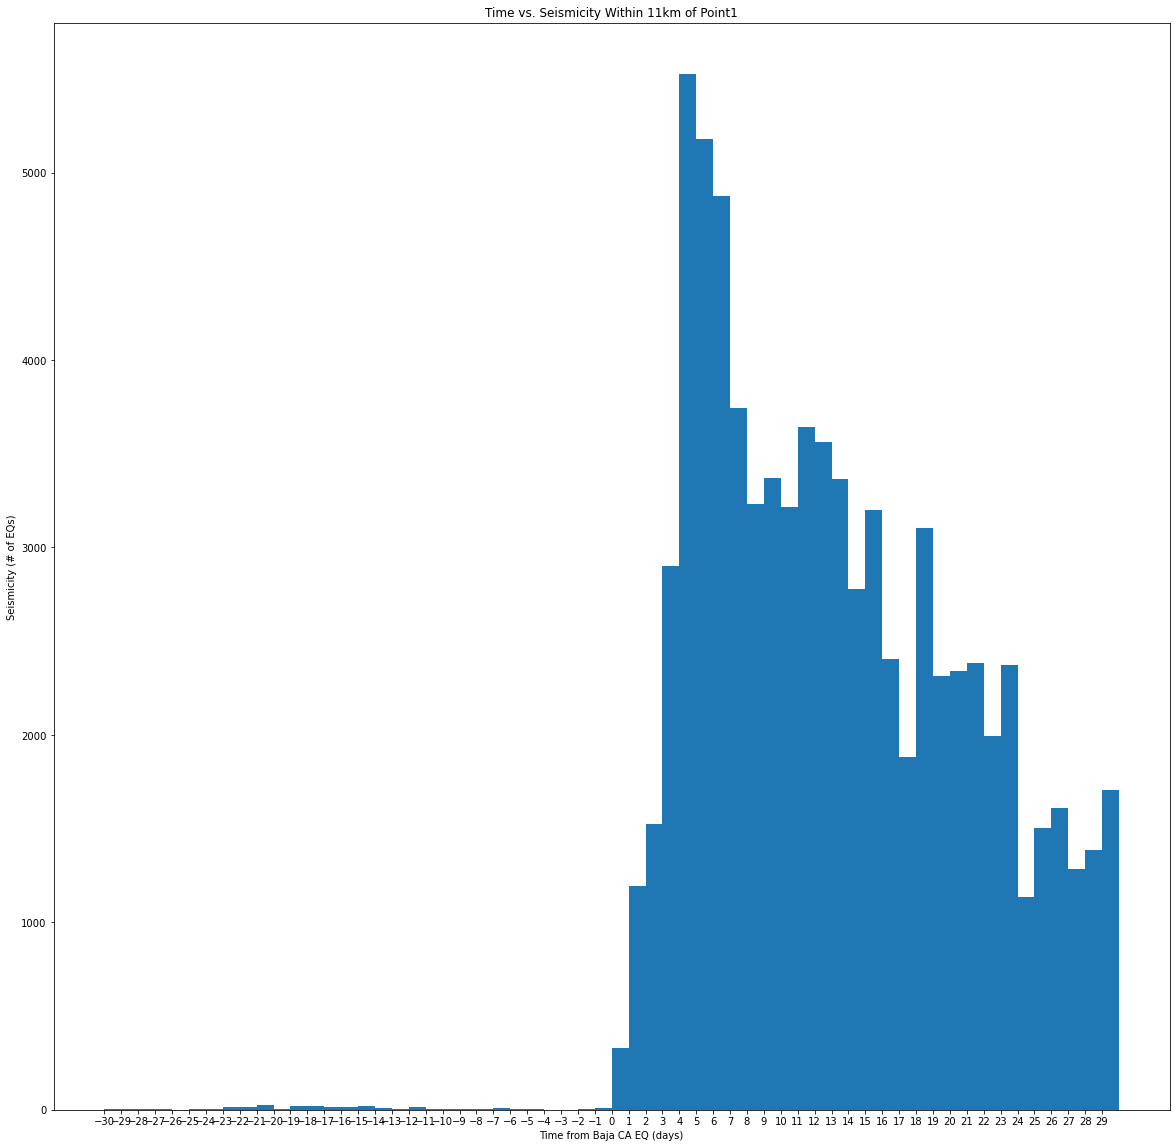

In [11]:
# Plot time vs. number of events: days

plt.figure(figsize=(20,20))
plt.hist(Point1Data_11KM["RELATIVE DAY"], bins = 60);
plt.xlabel("Time from Baja CA EQ (days)");
plt.ylabel("Seismicity (# of EQs)");
plt.title("Time vs. Seismicity Within 11km of Point1");
plt.xticks(range(-30,30));

plt.savefig("Maps/Density Grid/Point1/Point1_SeismicityDays.png", facecolor = "white")

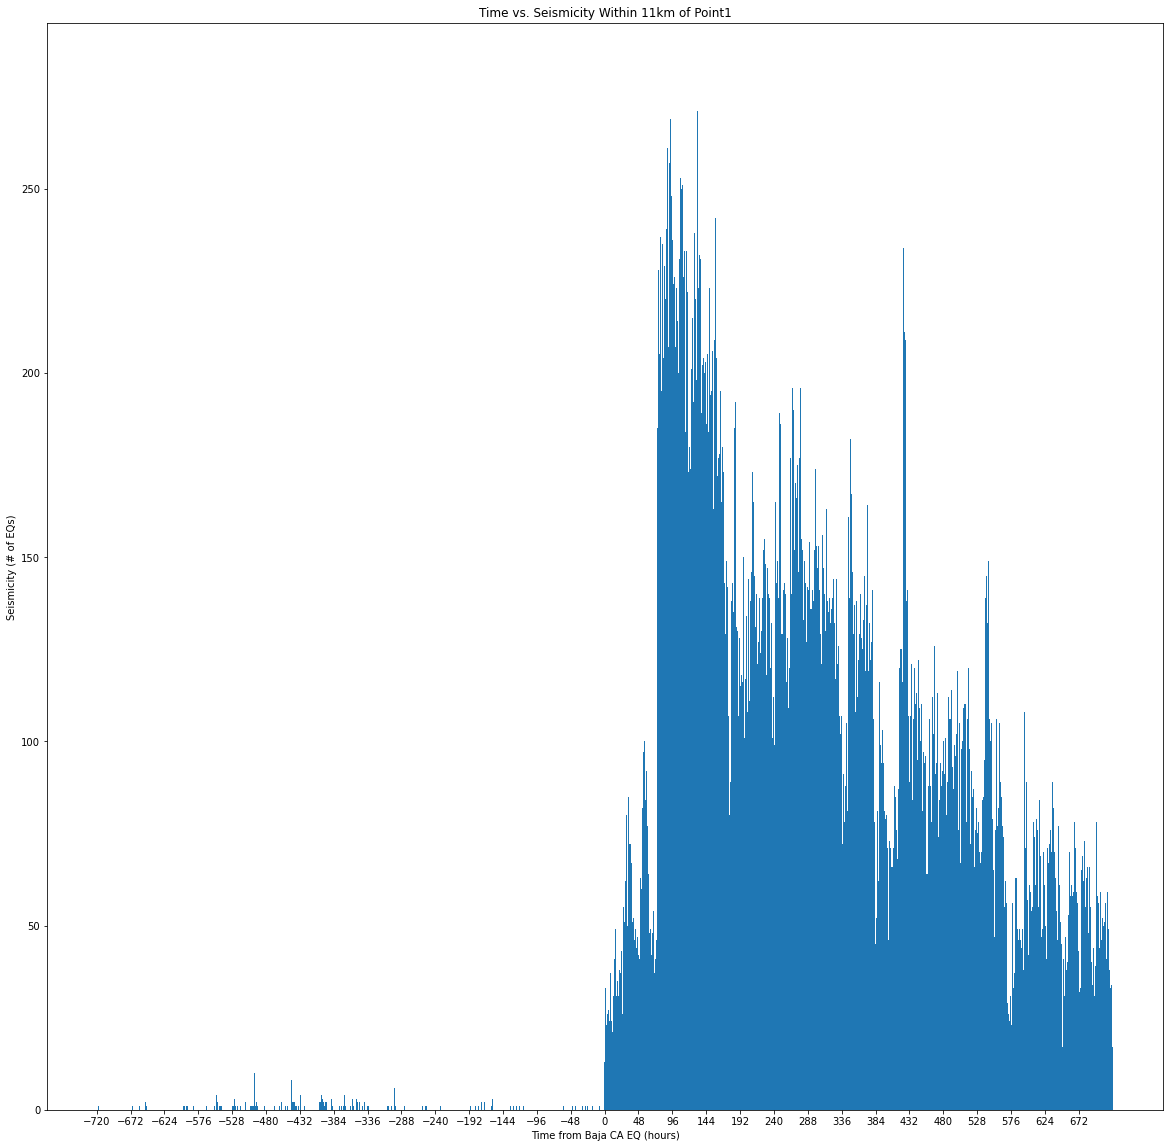

In [12]:
# Plot time vs. number of events: hours

plt.figure(figsize=(20,20))
plt.hist(Point1Data_11KM["RELATIVE HOUR"], bins = 60*24);
plt.xlabel("Time from Baja CA EQ (hours)");
plt.ylabel("Seismicity (# of EQs)");
plt.title("Time vs. Seismicity Within 11km of Point1");
plt.xticks(np.arange(-720, 720, 48));

plt.savefig("Maps/Density Grid/Point1/Point1_SeismicityHours.png", facecolor = "white")

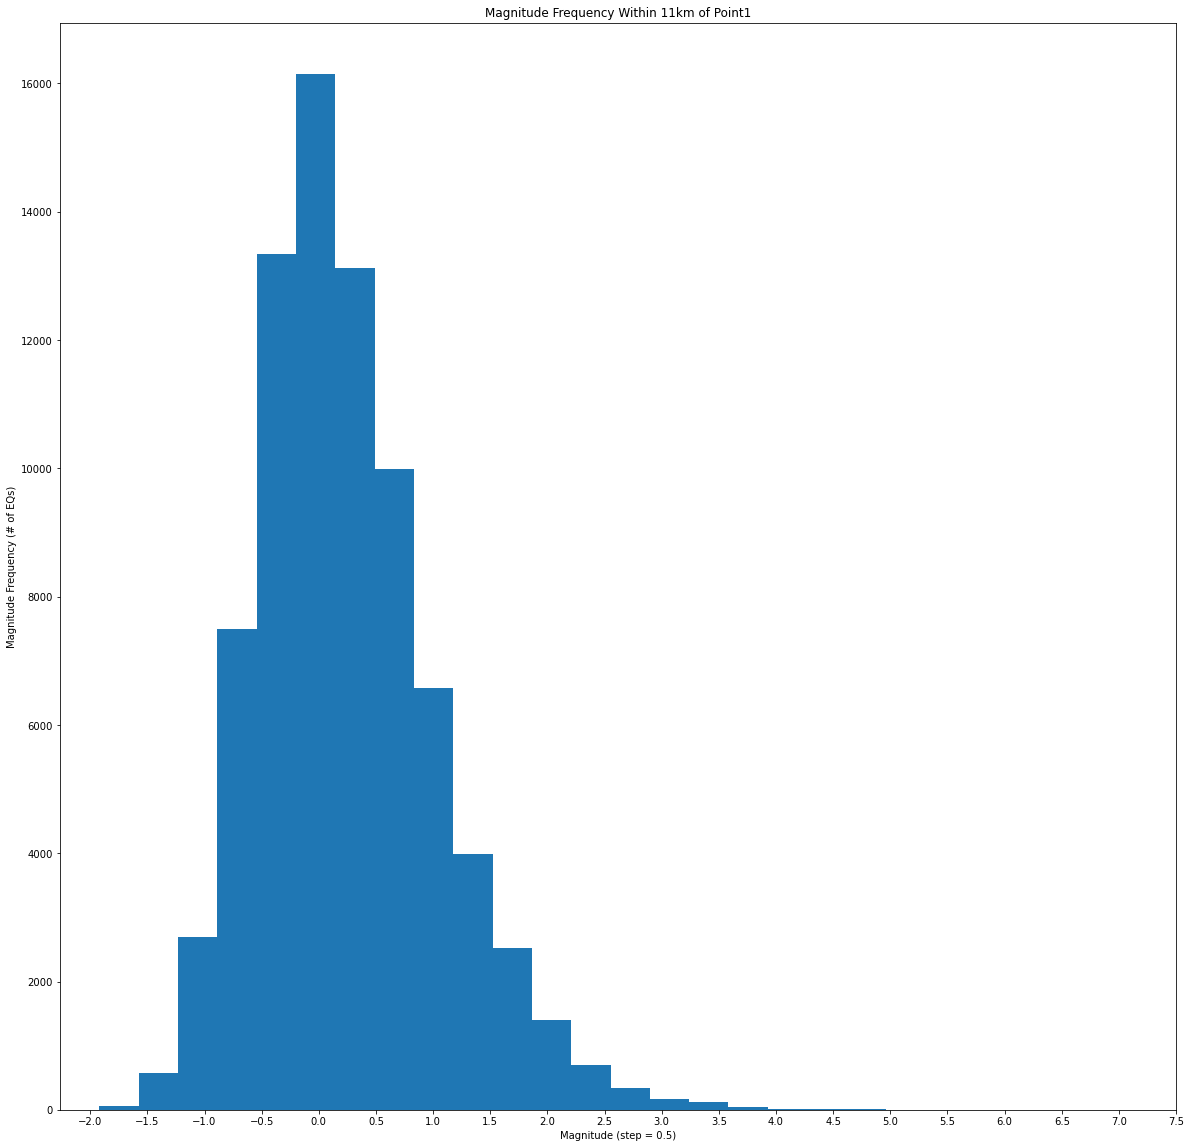

In [13]:
# Plot magnitude vs. event count (frequency)

plt.figure(figsize=(20,20))
plt.hist(Point1Data_11KM["MAGNITUDE"], bins = 20);
plt.xlabel("Magnitude (step = 0.5)");
plt.ylabel("Magnitude Frequency (# of EQs)");
plt.title("Magnitude Frequency Within 11km of Point1");
plt.xticks(np.arange(-2, 8, step = 0.5));

plt.savefig("Maps/Density Grid/Point1/Point1_MagFreq.png", facecolor = "white")